# Vacation Hours Distribution
## Author : Hugo COLLIN
### Date : 26/03/25

In [1]:
import pypyodbc

In [2]:
connection = pypyodbc.connect(driver='SQL Server',
                              server = 'HUGOC-INSPIRON\SQLBI',
                              database = 'AdventureWorks2022',
                              trusted_connection = 'yes'
                             )

connection.getinfo
cursor = connection.cursor()

In [3]:
Query = ("SELECT [JobTitle],sum([VacationHours]) as VacationHours FROM"
"[AdventureWorks2022].[HumanResources].[Employee]"
"group by [JobTitle]"
"order by [VacationHours] asc")


In [4]:
cursor.execute(Query)
results = cursor.fetchall()
type(results)

list

In [5]:
print(results)

[('Chief Financial Officer', 0), ('Vice President of Engineering', 1), ('Engineering Manager', 2), ('Senior Design Engineer', 3), ('Vice President of Sales', 10), ('North American Sales Manager', 14), ('Design Engineer', 15), ('Tool Designer', 17), ('Pacific Sales Manager', 20), ('European Sales Manager', 21), ('Marketing Manager', 40), ('Production Control Manager', 43), ('Master Scheduler', 44), ('Purchasing Manager', 49), ('Benefits Specialist', 51), ('Human Resources Manager', 54), ('Finance Manager', 55), ('Senior Tool Designer', 55), ('Assistant to the Chief Financial Officer', 56), ('Accounts Manager', 57), ('Vice President of Production', 64), ('Information Services Manager', 65), ('Network Manager', 68), ('Research and Development Manager', 77), ('Document Control Manager', 77), ('Quality Assurance Manager', 80), ('Quality Assurance Supervisor', 81), ('Facilities Manager', 86), ('Facilities Administrative Assistant', 87), ('Maintenance Supervisor', 92), ('Shipping and Receivin

In [6]:
import pandas as pd
dataframe = pd.DataFrame(results, columns=["Job Title", "Vacation Hours"])
dataframe.head()

,Job Title,Vacation Hours
0,Chief Financial Officer,0
1,Vice President of Engineering,1
2,Engineering Manager,2
3,Senior Design Engineer,3
4,Vice President of Sales,10


In [8]:
import matplotlib.pyplot as plt

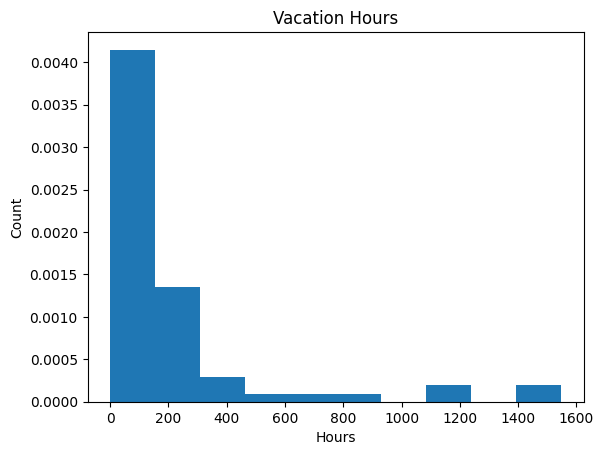

In [10]:
VacationHours = dataframe['Vacation Hours']
plt.hist(VacationHours, density=True)
plt.title('Vacation Hours')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.show()

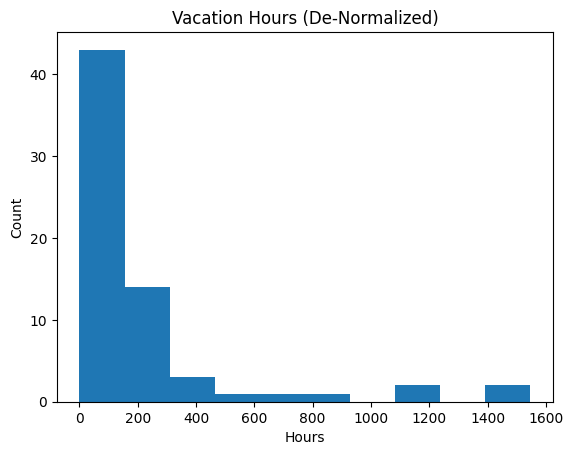

In [11]:
plt.hist(VacationHours)
plt.title('Vacation Hours (De-Normalized)')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.show()

In [12]:
# V- Dist normale

In [13]:
import numpy as np
import scipy.stats as stats

In [16]:
Vacation_Hours_mean = np.mean(VacationHours)
Vacation_Hours_std = np.std(VacationHours)
print(f'standard derivation =', Vacation_Hours_std)

standard derivation = 330.81740977453916


In [17]:
normal_distribution_curve = stats.norm.pdf(VacationHours, Vacation_Hours_mean, Vacation_Hours_std)

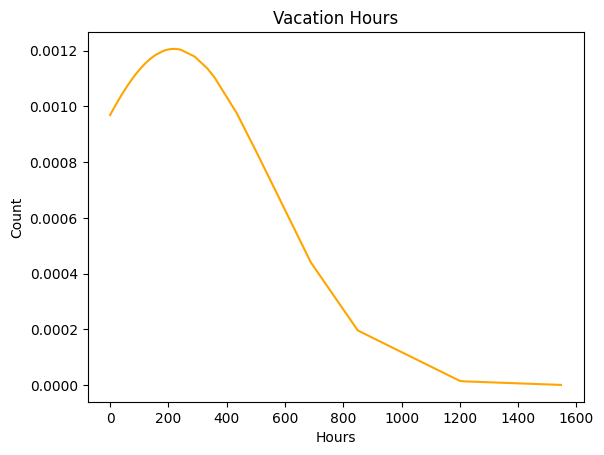

In [18]:
plt.title('Vacation Hours')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.plot(VacationHours, normal_distribution_curve, color='orange')

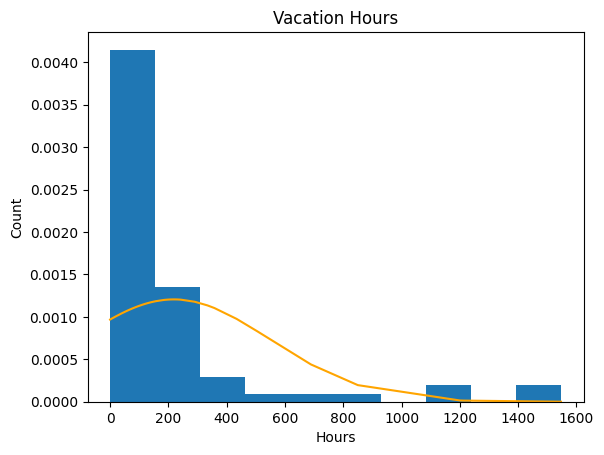

In [19]:
plt.hist(VacationHours, density=True)
plt.plot(VacationHours, normal_distribution_curve, color='orange')

plt.title('Vacation Hours')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.show()

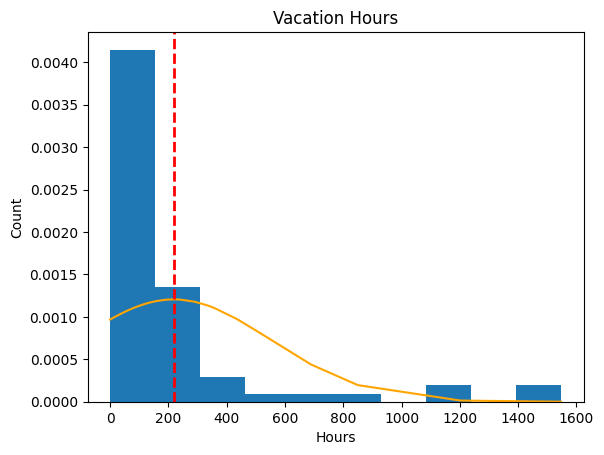

In [20]:
plt.hist(VacationHours, density=True)
plt.plot(VacationHours, normal_distribution_curve, color='orange')
plt.axvline(Vacation_Hours_mean, color='r', linestyle='dashed', linewidth=2)

plt.title('Vacation Hours')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.show()

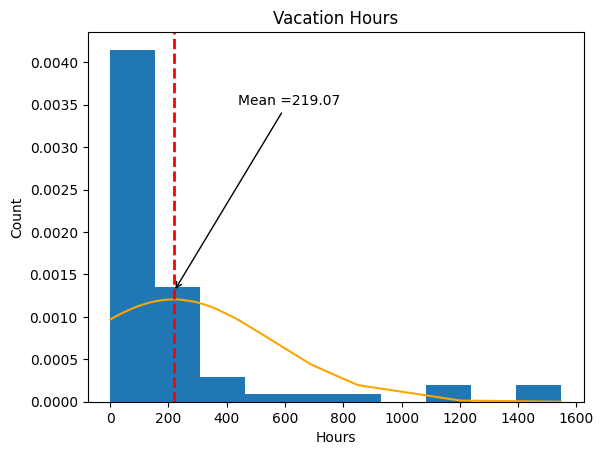

In [22]:
plt.hist(VacationHours, density=True)
plt.plot(VacationHours, normal_distribution_curve, color='orange')
plt.axvline(Vacation_Hours_mean, color='r', linestyle='dashed', linewidth=2)
plt.annotate('Mean =' + str(round(Vacation_Hours_mean, 2)),
             xy=(Vacation_Hours_mean, 0.0013), xycoords='data',
             xytext=(Vacation_Hours_mean * 2, 0.0035),
             textcoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3')
            )

plt.title('Vacation Hours')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.show()

In [23]:
dataframe.tail(10)

,Job Title,Vacation Hours
57,Quality Assurance Technician,334
58,Janitor,358
59,Sales Representative,434
60,Buyer,504
61,Production Technician - WC60,689
62,Production Technician - WC30,850
63,Production Technician - WC45,1200
64,Production Technician - WC50,1213
65,Production Technician - WC40,1547
66,Production Technician - WC10,1547


In [24]:
# VIII - Libs alt Graphiques Py

In [25]:
import seaborn as sb

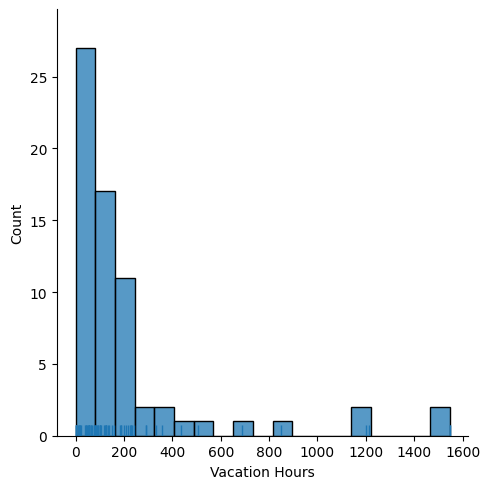

In [26]:
sb.displot(VacationHours, kde=False, rug=True)

<Axes: xlabel='Vacation Hours', ylabel='Density'>

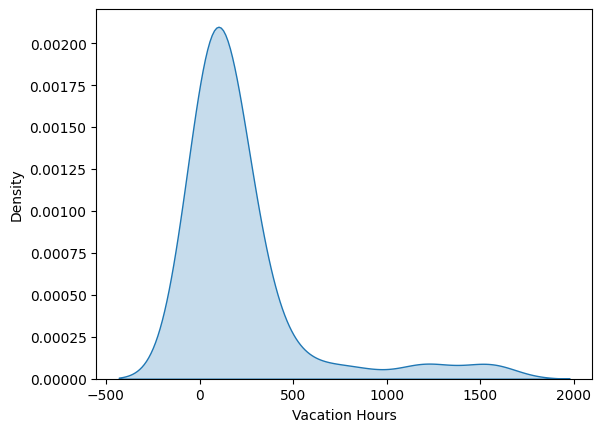

In [29]:
sb.kdeplot(VacationHours, fill=True) # shade=True is deprecated

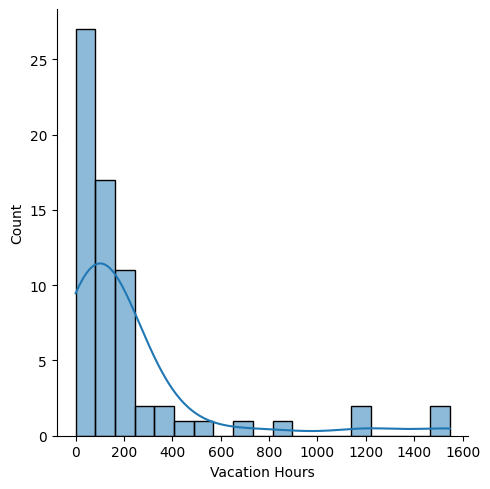

In [30]:
sb.displot(VacationHours, kde=True, rug=False)